### **4.1** Comparing a Convolutional NN with Dense NN with 0-4 hidden layers:

In [1]:
def createCNN(input_shape):
  model = Sequential()
  model.add(Conv2D(32, (3, 3), padding='same',input_shape = input_shape))
  model.add(Activation('relu'))
  model.add(Conv2D(32, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))
  return model


In [2]:
def trainNet(model, x_train, y_train, x_validate, y_validate, batch_size, epochs, data_augmentation, save_best_model):

# train without data augmentation
  if not data_augmentation:
    print('Not using data augmentation.')
    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(x_validate, y_validate),
                        shuffle=True,
                        callbacks=[save_best_model])
# train with data augmentation
  else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                        steps_per_epoch=math.ceil(x_train.shape[0]/batch_size),
                        epochs=epochs,
                        validation_data=(x_validate, y_validate),
                        callbacks=[save_best_model])
  return history


In [3]:
def loadData():
  # Load the data, split between train and test sets:
  (x_train, y_train), (x_test, y_test) = cifar10.load_data()
  # print('x_train shape:', x_train.shape)
  # print(x_train.shape[0], 'train samples')
  # print(x_test.shape[0], 'test samples')

  # Convert class vectors to binary class matrices.
  y_train = keras.utils.to_categorical(y_train, num_classes)
  y_test = keras.utils.to_categorical(y_test, num_classes)
  
  x_train = x_train.astype('float32')
  x_test = x_test.astype('float32')
  x_train /= 255
  x_test /= 255
  
  feature_vector_length = 32*32*3
  x_train_flat = x_train.reshape(x_train.shape[0], feature_vector_length)
  x_test_flat = x_test.reshape(x_test.shape[0], feature_vector_length)

  x_validate = x_train[40000:,:]
  x_train = x_train[:40000,:]
  y_validate = y_train[40000:,:]
  y_train = y_train[:40000,:]

  x_validate_flat = x_train_flat[40000:,:]
  x_train_flat = x_train_flat[:40000,:]
  
  return x_train, x_validate, x_test, y_train, y_validate, y_test, x_train_flat, x_validate_flat, x_test_flat 

In [4]:
def createDenseNetwork (input_shape, hiddenLayer ,num_classes):
  
  i = hiddenLayer
  
  model = Sequential()
  model.add(Dense(512, input_shape = input_shape ,activation = 'relu'))
  model.add(Dropout(0.5))
  
  while i!=0:
    model.add(Dense(512, activation = 'relu'))
    model.add(Dropout(0.5))
    i = i-1

  model.add(Dense(num_classes))
  model.add(Activation('softmax'))

  return model

170500096/170498071 [==============================] - 2s 0us/step
Not using data augmentation.
Epoch 1/20
1249/1250 [============================>.] - ETA: 0s - loss: 1.8164 - accuracy: 0.3362
Epoch 00001: val_accuracy improved from -inf to 0.44740, saving model to best_model_CNN.h5
1250/1250 [==============================] - 8s 6ms/step - loss: 1.8164 - accuracy: 0.3363 - val_loss: 1.5532 - val_accuracy: 0.4474
Epoch 2/20
1249/1250 [============================>.] - ETA: 0s - loss: 1.5141 - accuracy: 0.4508
Epoch 00002: val_accuracy improved from 0.44740 to 0.50610, saving model to best_model_CNN.h5
1250/1250 [==============================] - 7s 6ms/step - loss: 1.5139 - accuracy: 0.4509 - val_loss: 1.3837 - val_accuracy: 0.5061
Epoch 3/20
1241/1250 [============================>.] - ETA: 0s - loss: 1.3757 - accuracy: 0.5033
Epoch 00003: val_accuracy improved from 0.50610 to 0.53650, saving model to best_model_CNN.h5
1250/1250 [==============================] - 7s 6ms/step - loss: 

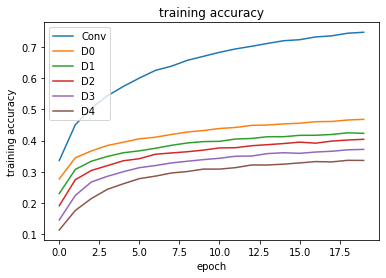

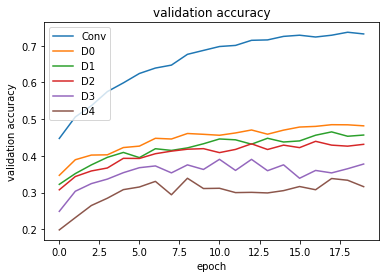

313/313 [==============================] - 1s 3ms/step - loss: 0.7751 - accuracy: 0.7388
Convolutional NN Test accuracy: 0.7387999892234802
313/313 [==============================] - 1s 2ms/step - loss: 1.4774 - accuracy: 0.4871
Dense Network with zero hidden layer Test accuracy: 0.4871000051498413
313/313 [==============================] - 1s 2ms/step - loss: 1.5168 - accuracy: 0.4686
Dense Network with one hidden layer Test accuracy: 0.46860000491142273
313/313 [==============================] - 1s 2ms/step - loss: 1.6376 - accuracy: 0.4408
Dense Network with two hidden layer Test accuracy: 0.4408000111579895
313/313 [==============================] - 1s 2ms/step - loss: 1.7428 - accuracy: 0.3996
Dense Network with three hidden layer Test accuracy: 0.39959999918937683
313/313 [==============================] - 1s 2ms/step - loss: 1.8887 - accuracy: 0.3457
Dense Network with four hidden layer Test accuracy: 0.3456999957561493


In [5]:
# libraries (do not import additional libraries)
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
import math
import matplotlib.pyplot as plt

# parameters for this script
batch_size = 32
num_classes = 10
epochs = 20
data_augmentation = False

x_train, x_validate, x_test, y_train, y_validate, y_test, x_train_flat, x_validate_flat, x_test_flat = loadData()

# Define a convolutional neural network
model_CNN = createCNN(input_shape=x_train.shape[1:])
model_D0 = createDenseNetwork((32*32*3,), 0 ,num_classes)
model_D1 = createDenseNetwork((32*32*3,), 1 ,num_classes)
model_D2 = createDenseNetwork((32*32*3,), 2 ,num_classes)
model_D3 = createDenseNetwork((32*32*3,), 3 ,num_classes)
model_D4 = createDenseNetwork((32*32*3,), 4 ,num_classes)
# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
# Compile the model before using it
model_CNN.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model_D0.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model_D1.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model_D2.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model_D3.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model_D4.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# print(model.summary())

# create a callback that will save the best model while training
save_best_model_CNN = ModelCheckpoint('best_model_CNN.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)
save_best_model_D0 = ModelCheckpoint('best_model_D0.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)
save_best_model_D1 = ModelCheckpoint('best_model_D1.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)
save_best_model_D2 = ModelCheckpoint('best_model_D2.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)
save_best_model_D3 = ModelCheckpoint('best_model_D3.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)
save_best_model_D4 = ModelCheckpoint('best_model_D4.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)

# train model
history_CNN = trainNet(model_CNN, x_train, y_train, x_validate, y_validate, batch_size, epochs, data_augmentation, save_best_model_CNN)
history_D0 = trainNet(model_D0, x_train_flat, y_train, x_validate_flat, y_validate, batch_size, epochs, data_augmentation, save_best_model_D0)
history_D1 = trainNet(model_D1, x_train_flat, y_train, x_validate_flat, y_validate, batch_size, epochs, data_augmentation, save_best_model_D1)
history_D2 = trainNet(model_D2, x_train_flat, y_train, x_validate_flat, y_validate, batch_size, epochs, data_augmentation, save_best_model_D2)
history_D3 = trainNet(model_D3, x_train_flat, y_train, x_validate_flat, y_validate, batch_size, epochs, data_augmentation, save_best_model_D3)
history_D4 = trainNet(model_D4, x_train_flat, y_train, x_validate_flat, y_validate, batch_size, epochs, data_augmentation, save_best_model_D4)

# Plot training accuracy
plt.plot(history_CNN.history['accuracy'])
plt.plot(history_D0.history['accuracy'])
plt.plot(history_D1.history['accuracy'])
plt.plot(history_D2.history['accuracy'])
plt.plot(history_D3.history['accuracy'])
plt.plot(history_D4.history['accuracy'])
plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(['Conv','D0','D1','D2','D3','D4'], loc='upper left')
plt.show()

# Plot validation accuracy
plt.plot(history_CNN.history['val_accuracy'])
plt.plot(history_D0.history['val_accuracy'])
plt.plot(history_D1.history['val_accuracy'])
plt.plot(history_D2.history['val_accuracy'])
plt.plot(history_D3.history['val_accuracy'])
plt.plot(history_D4.history['val_accuracy'])
plt.title('validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(['Conv','D0','D1','D2','D3','D4'], loc='upper left')
plt.show()

# Evaluate the best model saved (i.e., model with best validation accuracy) on the test set
saved_model_CNN = load_model('best_model_CNN.h5')
scores = saved_model_CNN.evaluate(x_test, y_test, verbose=1)
print('Convolutional NN Test accuracy:', scores[1])

saved_model_D0 = load_model('best_model_D0.h5')
scores = saved_model_D0.evaluate(x_test_flat, y_test, verbose=1)
print('Dense Network with zero hidden layer Test accuracy:', scores[1])

saved_model_D1 = load_model('best_model_D1.h5')
scores = saved_model_D1.evaluate(x_test_flat, y_test, verbose=1)
print('Dense Network with one hidden layer Test accuracy:', scores[1])

saved_model_D2 = load_model('best_model_D2.h5')
scores = saved_model_D2.evaluate(x_test_flat, y_test, verbose=1)
print('Dense Network with two hidden layer Test accuracy:', scores[1])

saved_model_D3 = load_model('best_model_D3.h5')
scores = saved_model_D3.evaluate(x_test_flat, y_test, verbose=1)
print('Dense Network with three hidden layer Test accuracy:', scores[1])

saved_model_D4 = load_model('best_model_D4.h5')
scores = saved_model_D4.evaluate(x_test_flat, y_test, verbose=1)
print('Dense Network with four hidden layer Test accuracy:', scores[1])

As we are training an image data, the convolutional neural network would give us a better accuracy than a dense neural nwtwol. This is because of the fact that the convolutional neural nets are basically made for image processing data as they deal with tensors instead of flatten data. 
About the accuracy results of dense networks with different hidden layers as dense networks are fully connected networks it makes a dense NN and makes the learning inefficient because of the redundancy caused with so many connections. While flattenign the data special data is lost in while CNN can work best with spatial correlation between the image datas. That is why in my results the best accuracy is for CNN and after that the shallower the neural net the better accuracy we get in dense models.
This info was extracted from the article: https://medium.com/analytics-vidhya/cnn-convolutional-neural-network-8d0a292b4498

